In [1]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('pictures/havregryn.png')

import numpy as np


# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image,127,255,cv2.THRESH_BINARY)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

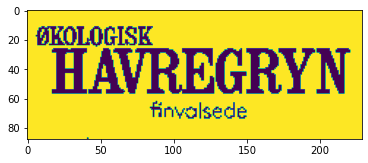

In [2]:
gray = get_grayscale(img)
thresh = thresholding(gray)
opening = opening(gray)
inverted=np.invert(gray)
invthr=thresholding(gray)

canny = canny(gray)

plt.imshow(invthr)
adaptive_threshold = cv2.adaptiveThreshold(inverted, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 85, 11)



inverted threshold
ØKOLOGISK

HAVREGRYN

adaptive



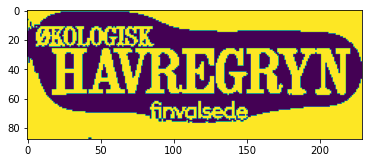

In [3]:



print("inverted threshold")

print (pytesseract.image_to_string(invthr,config='-l dan'))
print("adaptive")
plt.imshow(adaptive_threshold)

print(pytesseract.image_to_string(adaptive_threshold,config='-l dan'))





In [4]:
import cv2
import pytesseract



#pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Grayscale, Gaussian blur, Otsu's threshold
#image = cv2.imread('1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# Perform text extraction
data = pytesseract.image_to_string(kernel, lang='dan')
print(data)












3
33s+56
32,0###### 